***
# Building prediction model
***

1. **Train data on sales of 2017-2018**
2. **Predict sales 2019-2021 and compare with real values**
3. **Add the subsides and compare the sales**
4. **Evaluate the impact of RV**
<br>

***

In [1]:
# Module that sets paths
import path

path_data =     path.path_data
path_df =       path.path_df
path_output =   path.path_output

Le dossier « Dataframe » est existant
Le dossier « Output » est existant
Le dossier « Data » est existant

c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Data\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Dataframe\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Output\


***
<b>Ce qu'on veut prédire</b> : TYP_CARBU (VÉ = L)

<b>Variables explicatives</b> : MASSE_NETTE, COUL_ORIG, TYP_DOSS_PERS, PHYS_SEX, PHYS_AGE, REG_ADM, MRC

***
Étapes :
1. feature enginering (encode)
2. train on 2017 and 2018
3. forcast 2019 to 2021
3. compare with real results

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df_unique = pd.read_hdf(path_df + 'df_unique.h5')
df_unique.head(2)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max,prix_mean,cons_mean
0,2017,2017_0000000016,PAU,AU,FORD,ESCAP,2017,1662.0,4.0,2001.0,NaN,ROU,E,P,F,76.0,Centre-du-Québec (17),Drummond (49 ),49030.0,https://www.guideautoweb.com/constructeurs/for...,2017,escape,ford,25099.0,35999.0,7.8,11.5,30549.0,9.65
1,2017,2017_0000000022,PAU,AU,CHEVR,VOLT,2017,1578.0,4.0,1509.0,NaN,NOI,W,P,M,33.0,Saguenay–Lac-Saint-Jean (02),Saguenay (941),94068.0,https://www.guideautoweb.com/constructeurs/che...,2017,volt,chevrolet,38790.0,42890.0,5.5,5.6,40840.0,5.55


In [22]:
# Add columns with the prices of EV without subsidie
def subvention(df, col):
    df[f'{col}_nosub'] = np.where((df['TYP_CARBU'] == 'L') & (df['prix_max']< 60000), df[col] + 7000, df[col])
    df[f'{col}_nosub'] = np.where((df['TYP_CARBU'] == 'W') & (df['prix_max'] < 60000), df[col] + 5000, df[f'{col}_nosub'] )

df = df_unique.copy()
subvention(df, 'prix_mean')

df.head(3)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max,prix_mean,cons_mean,prix_mean_nosub
0,2017,2017_0000000016,PAU,AU,FORD,ESCAP,2017,1662.0,4.0,2001.0,NaN,ROU,E,P,F,76.0,Centre-du-Québec (17),Drummond (49 ),49030.0,https://www.guideautoweb.com/constructeurs/for...,2017,escape,ford,25099.0,35999.0,7.8,11.5,30549.0,9.65,30549.0
1,2017,2017_0000000022,PAU,AU,CHEVR,VOLT,2017,1578.0,4.0,1509.0,NaN,NOI,W,P,M,33.0,Saguenay–Lac-Saint-Jean (02),Saguenay (941),94068.0,https://www.guideautoweb.com/constructeurs/che...,2017,volt,chevrolet,38790.0,42890.0,5.5,5.6,40840.0,5.55,45840.0
2,2017,2017_0000000041,PAU,AU,NISSA,VERSA,2017,1113.0,4.0,1607.0,NaN,GRI,E,P,F,87.0,Laurentides (15),Les Laurentides (78 ),78010.0,https://www.guideautoweb.com/constructeurs/nis...,2017,versa-note,nissan,14498.0,19748.0,6.2,8.6,17123.0,7.40,17123.0


In [23]:
# Missing values
col_to_drop = ['CYL_VEH', 'NB_CYL', 'NB_ESIEU_MAX', 'MASSE_NETTE', 'TYP_DOSS_PERS']
df = df.drop(columns=col_to_drop)
df.isna().sum()

AN                        0
NOSEQ_VEH                 0
CLAS                      0
TYP_VEH_CATEG_USA         0
MARQ_VEH                  0
MODEL_VEH                 0
ANNEE_MOD                 0
COUL_ORIG             42630
TYP_CARBU                 0
PHYS_SEX             492920
PHYS_AGE             492920
REG_ADM               22168
MRC                   22168
CG_FIXE               22168
link_model_an        289509
year                 289509
model                289509
brand                289509
prix_min             289519
prix_max             309633
cons_min             368916
cons_max             368916
prix_mean            309633
cons_mean            368916
prix_mean_nosub      309633
dtype: int64

In [25]:
# Dealling with missing values
df_nona= df.dropna()

print(df_nona.isna().sum())

print(f'Nombre d\'observation avant : {len(df)}')
print(f'Nombre d\'observation avant : {len(df_nona)}')

# Pour l'instant juste les enlever, mais éventuellement il faudra en analyser la cause

AN                   0
NOSEQ_VEH            0
CLAS                 0
TYP_VEH_CATEG_USA    0
MARQ_VEH             0
MODEL_VEH            0
ANNEE_MOD            0
COUL_ORIG            0
TYP_CARBU            0
PHYS_SEX             0
PHYS_AGE             0
REG_ADM              0
MRC                  0
CG_FIXE              0
link_model_an        0
year                 0
model                0
brand                0
prix_min             0
prix_max             0
cons_min             0
cons_max             0
prix_mean            0
cons_mean            0
prix_mean_nosub      0
dtype: int64
Nombre d'observation avant : 2242375
Nombre d'observation avant : 1481742


In [26]:
df_pre2018 = df_nona.loc[df_nona['AN'] <= 2018]
df_post2018 = df_nona.loc[df_nona['AN'] > 2018]

In [97]:
df_pre2018[['AN' , 'COUL_ORIG', 'PHYS_SEX', 'PHYS_AGE' ,'REG_ADM', 'MRC', 'prix_mean']].head()

,AN,COUL_ORIG,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,prix_mean
0,2017,ROU,F,76.0,Centre-du-Québec (17),Drummond (49 ),30549.0
1,2017,NOI,M,33.0,Saguenay–Lac-Saint-Jean (02),Saguenay (941),40840.0
2,2017,GRI,F,87.0,Laurentides (15),Les Laurentides (78 ),17123.0
3,2017,ROU,M,57.0,Lanaudière (14),Les Moulins (64 ),18010.0
4,2017,BLA,M,24.0,Mauricie (04),Maskinongé (51 ),40598.0


In [91]:
# Model : DecisionTreeClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

y = df_pre2018['TYP_CARBU']
X = df_pre2018[['AN' , 'COUL_ORIG', 'PHYS_SEX', 'PHYS_AGE' ,'REG_ADM', 'MRC', 'prix_mean']]

X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=14, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.98


C:\Users\Charles_tour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charles_tour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           D       0.24      0.05      0.08       332
           E       0.99      1.00      0.99    123888
           H       0.77      0.45      0.57      2314
           L       0.55      0.51      0.53       405
           N       0.00      0.00      0.00         2
           P       0.00      0.00      0.00         2
           W       0.81      0.79      0.80      2474

    accuracy                           0.98    129417
   macro avg       0.48      0.40      0.42    129417
weighted avg       0.97      0.98      0.98    129417



C:\Users\Charles_tour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<u>**Note**</u>
- **Precision** is a measure of how many of the predicted positive instances were actually correct.
- **Recall**, also known as sensitivity or true positive rate, measures how many of the actual positive instances were correctly predicted. 
- **F1-score** is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.

- **Macro Average** : This metric is calculated by taking the unweighted average of precision, recall, and F1-score across all classes. 
- **Weighted Average** : This metric is calculated by taking a weighted average of precision, recall, and F1-score, where the weights are determined by the number of instances in each class. 

In [100]:
# Model : XGBoost 
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

y = df_pre2018['TYP_CARBU']
X = df_pre2018[['AN', 'COUL_ORIG', 'PHYS_SEX', 'PHYS_AGE', 'REG_ADM', 'MRC', 'prix_mean']]
X_encoded = pd.get_dummies(X)

# change y to numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(max_depth=14, n_estimators=100, learning_rate=0.1) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           1       0.39      0.06      0.11       332
           2       0.99      1.00      0.99    123888
           3       0.76      0.47      0.58      2314
           4       0.59      0.47      0.53       405
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           8       0.83      0.78      0.81      2474

    accuracy                           0.98    129417
   macro avg       0.51      0.40      0.43    129417
weighted avg       0.98      0.98      0.98    129417



C:\Users\Charles_tour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charles_tour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charles_tour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_c

In [95]:
# Cross validation using kFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy scores
scores = cross_val_score(model, X_encoded, y, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)

# Calculate the mean and standard deviation of the scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Cross-Validation Accuracy Mean:", mean_accuracy)
print("Cross-Validation Accuracy Standard Deviation:", std_accuracy)

Cross-Validation Accuracy Scores: [0.97839559 0.97731382 0.97822559 0.97853434 0.97799345 0.97902887
 0.97873524 0.97927613 0.97797799 0.97785436]
Cross-Validation Accuracy Mean: 0.9783335384573757
Cross-Validation Accuracy Standard Deviation: 0.0005568361878776315


***
## Predictions
***

In [117]:
# predict after 2018, original data
X_sub = df_post2018[['AN', 'COUL_ORIG', 'PHYS_SEX', 'PHYS_AGE', 'REG_ADM', 'MRC', 'prix_mean']]
X_new_encoded = pd.get_dummies(X_sub)
y_pred_sub = model.predict(X_new_encoded)

# predict after 2018, stop subvention
X_nosub = df_post2018[['AN', 'COUL_ORIG', 'PHYS_SEX', 'PHYS_AGE', 'REG_ADM', 'MRC', 'prix_mean_nosub']]
X_nosub = X_nosub.rename(columns={'prix_mean_nosub' : 'prix_mean'})
X_new_encoded = pd.get_dummies(X_nosub)
y_pred_nosub = model.predict(X_new_encoded)



# Put togheter all columns
new_df = X_sub.copy()
new_df['TYP_CARBU_real'] = df_post2018['TYP_CARBU']
new_df['TYP_CARBU_predict_sub'] = y_pred_sub
new_df['TYP_CARBU_predict_nosub'] = y_pred_nosub
new_df.head(3)



# Sum by type of fuel
real_count = new_df.groupby(['AN', 'TYP_CARBU_real']).size().reset_index(name='obs').rename(columns={'TYP_CARBU_real':'TYP_CARBU', 'obs':'TYP_CARBU_real'})
predsub_count = new_df.groupby(['AN', 'TYP_CARBU_predict_sub']).size().reset_index(name='obs').rename(columns={'TYP_CARBU_predict_sub':'TYP_CARBU', 'obs':'TYP_CARBU_predict_sub'})
prednosub_count = new_df.groupby(['AN', 'TYP_CARBU_predict_nosub']).size().reset_index(name='obs').rename(columns={'TYP_CARBU_predict_nosub':'TYP_CARBU', 'obs':'TYP_CARBU_predict_nosub'})

# Change numerical TYP_CARBU for original values
label_mapping = {original_label: encoded_label for original_label, encoded_label in zip(y, y_encoded)}
inverse_label_mapping = {v: k for k, v in label_mapping.items()}
predsub_count['TYP_CARBU'] = predsub_count['TYP_CARBU'].replace(inverse_label_mapping)
prednosub_count['TYP_CARBU'] = prednosub_count['TYP_CARBU'].replace(inverse_label_mapping)


result = pd.merge(real_count, predsub_count)
result = pd.merge(result, prednosub_count)

result['Accuracy'] = result['TYP_CARBU_predict_sub'] - result['TYP_CARBU_real']


# result.to_excel(path_output + 'result_test.xlsx')
result

,AN,TYP_CARBU,TYP_CARBU_real,TYP_CARBU_predict_sub,TYP_CARBU_predict_nosub,Accuracy
0,2019,D,240,343,16,103
1,2019,E,274965,285391,292538,10426
2,2019,H,6704,3629,2152,-3075
3,2019,L,4381,2171,287,-2210
4,2019,W,9024,3800,341,-5224
5,2020,D,123,688,141,565
6,2020,E,238915,254060,254634,15145
7,2020,H,6263,3346,3346,-2917
8,2020,L,5625,187,187,-5438
9,2020,W,9218,1874,1847,-7344


***
## Results
1. Accuracy: 0.94: The overall accuracy of your model is 94%, indicating that it correctly predicts the class labels for approximately 94% of the total instances.
2. Precision : the ratio of true positive predictions to the total positive predictions made by the model. Precision = True Positives / (True Positives + False Positives)
3. Recall (Sensitivity or True Positive Rate) : Recall is the ratio of true positive predictions to the total actual positives in the dataset.
4. F1-Score: F1-Score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall, providing a single metric that combines both aspects.
F1-Score is calculated as: F1-Score = 2 * (Precision * Recall) / (Precision + Recall).

<u>**Type de carburant**</u> <br>
A = Autre <br>
C = Hydrogène <br>
D = Diésel <br>
E = Essence <br>
H = Hybride <br>
L = Électricité <br>
M = Méthanol <br>
N = Gaz naturel <br>
P = Propane <br>
S = Non-propulsé <br>
T = Éthanol <br>
W = Hybride branchable <br>
blanc = Non précisé <br>

IndexError: index 7 is out of bounds for axis 1 with size 7

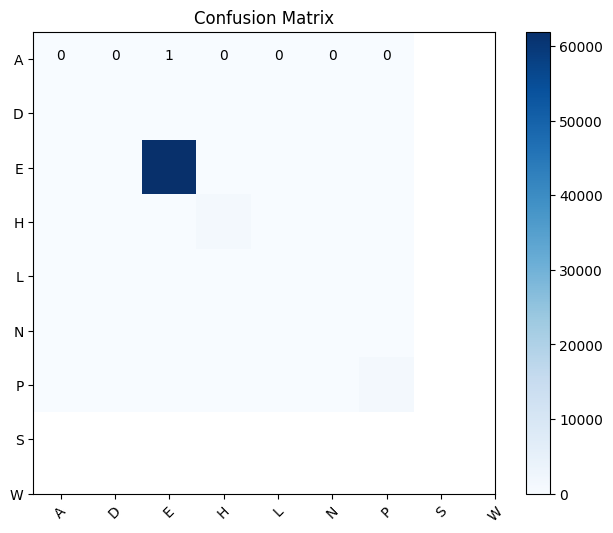

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Create a confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = model.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [20]:
# Number of top features to display
top_n = 10  # Change this value to the number of top features you want to display

# Sort feature importances and select the top N
sorted_feature_importance = sorted(zip(feature_importance, feature_names), reverse=True)
top_feature_importance = sorted_feature_importance[:top_n]
top_feature_names, top_feature_importance = zip(*top_feature_importance)

# Create a bar chart to visualize the top features
fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(range(len(top_feature_importance)), top_feature_importance)
plt.yticks(range(len(top_feature_importance)), top_feature_names)
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Feature Importance of the Decision Tree')
plt.show()


NameError: name 'feature_importance' is not defined